# Saildrone data example

In [1]:
from erddapy import ERDDAP

server = "https://ferret.pmel.noaa.gov/pmel/erddap"
e = ERDDAP(server=server, protocol="tabledap")

e.dataset_id = "sd1060_hurricane_2021"

In [2]:
e.variables = [
    "trajectory",
    "latitude",
    "longitude",
    "TEMP_SBE37_MEAN",
]

In [3]:
df = e.to_pandas()
df.head()

,trajectory,latitude (degrees_north),longitude (degrees_east),TEMP_SBE37_MEAN (degree_C)
0,1060.0,19.396141,-65.720499,28.5016
1,1060.0,19.396594,-65.720678,NaN
2,1060.0,19.397053,-65.720934,NaN
3,1060.0,19.397486,-65.721126,NaN
4,1060.0,19.397936,-65.721357,NaN


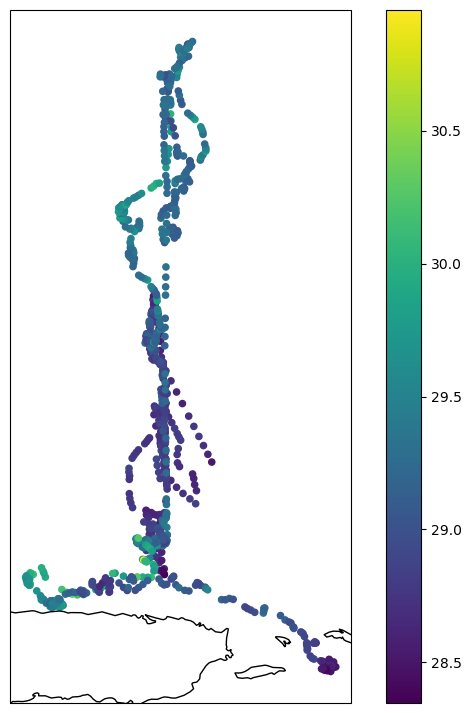

In [4]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 9), subplot_kw={"projection": ccrs.PlateCarree()})

subset = 100

cs = ax.scatter(
    df["longitude (degrees_east)"][::subset],
    df["latitude (degrees_north)"][::subset],
    s=20,
    c=df["TEMP_SBE37_MEAN (degree_C)"][::subset],
)

ax.coastlines("10m")

plt.colorbar(cs);